In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import pandas as pd
import numpy as np
import warnings
import sys

In [2]:
# ignore warnings
warnings.filterwarnings('ignore')

In [3]:
# importing scripts
sys.path.insert(1, '../scripts')

from data_viz import Data_Viz
from data_cleaning import DataCleaner
from data_transformation import DataTransformer

DV = Data_Viz()
DC = DataCleaner()
DT = DataTransformer()


In [4]:
# importing datasets
sample_df = pd.read_csv("../data/sample_submission.csv")
store_df = pd.read_csv("../data/store.csv")
test_df = pd.read_csv("../data/test.csv")
train_df = pd.read_csv("../data/train.csv")

In [7]:
# checking sample dataset
DV.summ_columns(sample_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Id,0,0.0,int64,41088
1,Sales,0,0.0,int64,1


In [8]:
DV.summ_columns(store_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,3,0.0,float64,655
4,CompetitionOpenSinceMonth,354,32.0,float64,13
5,CompetitionOpenSinceYear,354,32.0,float64,24
6,Promo2,0,0.0,int64,2
7,Promo2SinceWeek,544,49.0,float64,25
8,Promo2SinceYear,544,49.0,float64,8
9,PromoInterval,544,49.0,object,4


In [11]:
# checking if the promo dates are 0 becuase promo2 is 0

promo2_1_df = store_df.loc[store_df['Promo2'] == 1]
DV.summ_columns(promo2_1_df)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,571
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,1,0.0,float64,397
4,CompetitionOpenSinceMonth,206,36.0,float64,13
5,CompetitionOpenSinceYear,206,36.0,float64,24
6,Promo2,0,0.0,int64,1
7,Promo2SinceWeek,0,0.0,float64,24
8,Promo2SinceYear,0,0.0,float64,7
9,PromoInterval,0,0.0,object,3


In [12]:
store_df['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [15]:
# replacing empty values with 0 and NA
store_clean = store_df.copy(deep=True)
store_clean['Promo2SinceWeek'] = store_df['Promo2SinceWeek'].fillna(0)
store_clean['Promo2SinceYear'] = store_df['Promo2SinceYear'].fillna(0)
store_clean['PromoInterval'] = store_df['PromoInterval'].fillna('-')

In [16]:
# removing columns with more than 30% missing value

store_clean = DC.reduce_dim_missing(store_clean, 30)
store_clean

,Store,StoreType,Assortment,CompetitionDistance,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,0,0.0,0.0,-
1,2,a,a,570.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,0,0.0,0.0,-
4,5,a,a,29910.0,0,0.0,0.0,-
...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,0,0.0,0.0,-
1112,1113,a,c,9260.0,0,0.0,0.0,-
1113,1114,a,c,870.0,0,0.0,0.0,-


In [17]:
# checking cleaned data 
DV.summ_columns(store_clean)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,StoreType,0,0.0,object,4
2,Assortment,0,0.0,object,3
3,CompetitionDistance,3,0.0,float64,655
4,Promo2,0,0.0,int64,2
5,Promo2SinceWeek,0,0.0,float64,25
6,Promo2SinceYear,0,0.0,float64,8
7,PromoInterval,0,0.0,object,4


In [21]:
# merging datasets
train_store = pd.merge(train_df, store_clean, how = 'left', on = "Store")
test_store = pd.merge(test_df, store_clean, how='left', on = 'Store')

In [22]:
# checking store dataset
print(train_store.shape)
DV.summ_columns(train_store)

(1017209, 16)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,int64,21734
4,Customers,0,0.0,int64,4086
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,5
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


In [23]:
print(test_store.shape)
DV.summ_columns(test_store)

(41088, 15)


,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Id,0,0.0,int64,41088
1,Store,0,0.0,int64,856
2,DayOfWeek,0,0.0,int64,7
3,Date,0,0.0,object,48
4,Open,11,0.0,float64,3
5,Promo,0,0.0,int64,2
6,StateHoliday,0,0.0,object,2
7,SchoolHoliday,0,0.0,int64,2
8,StoreType,0,0.0,object,4
9,Assortment,0,0.0,object,3


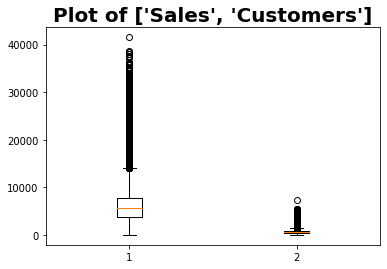

In [24]:
# checking for outliers

DV.plot_box2(train_store, ['Sales', 'Customers'])

**Observation**
- sales and customers have outliers

In [25]:
# a pipeline to handle missing values and outliers.
pipe = Pipeline(steps=[ ("Handle numerical missing values", FunctionTransformer(DC.fill_missing_by_median)),
                        ("Handle categorical missing values", FunctionTransformer(DC.fill_missing_by_mode)),
                        ("Handle outlier", FunctionTransformer(DC.fill_outliers_mean, kw_args={'cols':['Sales', 'Customers']}))])

In [26]:
# running the train dataset in the cleaning pipe

train_store_clean = pipe.fit_transform(train_store)

DV.summ_columns(train_store_clean)

,variables,missing_count,missing_percent_(%),data_type,unique_values
0,Store,0,0.0,int64,1115
1,DayOfWeek,0,0.0,int64,7
2,Date,0,0.0,object,942
3,Sales,0,0.0,float64,13194
4,Customers,0,0.0,float64,1423
5,Open,0,0.0,int64,2
6,Promo,0,0.0,int64,2
7,StateHoliday,0,0.0,object,5
8,SchoolHoliday,0,0.0,int64,2
9,StoreType,0,0.0,object,4


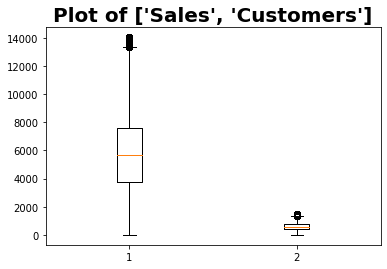

In [27]:
# checking if outliers are handled

DV.plot_box2(train_store_clean, ['Sales', 'Customers'])

In [28]:
# saving cleaned dataframes
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

train_store_clean.to_csv("../data/train_store.csv", index = False)
train_store_clean.to_csv("../data/test_store.csv", index = False)

In [29]:
train_df['StateHoliday'].value_counts().index

Index(['0', 0, 'a', 'b', 'c'], dtype='object')

one of the 0 is string while the other is integer, let's change the int-type to str and so that we won't have different 0 plots

In [30]:
def replace_rows_str(df, col):
    df[col] = df[col].map(str)
    df[col] = df[col].apply(str)
    df[col] = df[col].astype(str)
    df[col] = df[col].values.astype(str)
    return(df[col].value_counts().index)
    
replace_rows_str(train_df, "StateHoliday")

Index(['0', 'a', 'b', 'c'], dtype='object')

In [33]:
def rename(df, col, old, new):
    df[col] = df[col].replace([old], new)
    return(df[col].value_counts().index)

rename(train_df, "StateHoliday", '0', 'No_holiday')
rename(train_df, "StateHoliday", 'a', 'Public holiday')
rename(train_df, "StateHoliday", 'b', 'Easter')
rename(train_df, "StateHoliday", 'c', 'Christmas')

Index(['No_holiday', 'Public holiday', 'Easter', 'Christmas'], dtype='object')

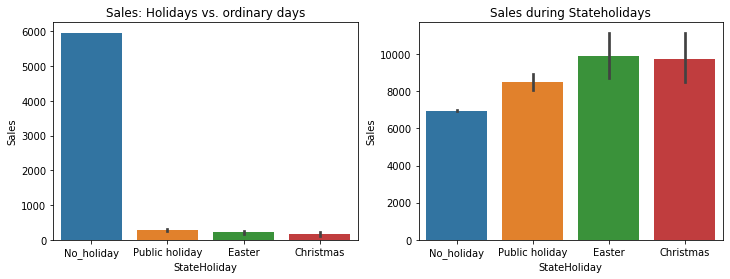

In [35]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=train_df, ax=axis1).set_title('Sales: Holidays vs. ordinary days')

# holidays only
mask = (train_df["StateHoliday"] != "0") & (train_df["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=train_df[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()